# **Viewing classes in Directory**





In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "Data"

classes = os.listdir(dir_example)
print(classes)

['README.md', 'Test', 'Train']


In [2]:
dir_example = "Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['andrao', 'asiatica', 'auranti', 'barca', 'maru', 'stewartii']


# **Visualizing Images in Dataset from each class**

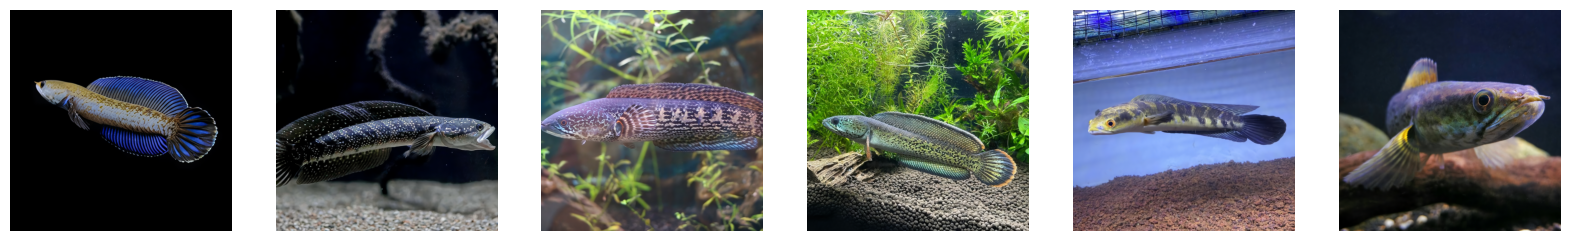

In [4]:
dir_with_examples = 'visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

# **Importing required Libraries for Model**

In [5]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet18

# **Data Configuration**

In [6]:
train = 'Data/Train'
test = 'Data/Test'

# **Data Preparation and Loading**

### *Creating a Generator for Training Set*

In [8]:

train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 480 images belonging to 6 classes.
{'andrao': 0, 'asiatica': 1, 'auranti': 2, 'barca': 3, 'maru': 4, 'stewartii': 5} 

{0: 'andrao', 1: 'asiatica', 2: 'auranti', 3: 'barca', 4: 'maru', 5: 'stewartii'}


### *Creating a Generator for Testing Set*

In [9]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 120 images belonging to 6 classes.
{'andrao': 0, 'asiatica': 1, 'auranti': 2, 'barca': 3, 'maru': 4, 'stewartii': 5} 

{0: 'andrao', 1: 'asiatica', 2: 'auranti', 3: 'barca', 4: 'maru', 5: 'stewartii'}


In [10]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape


((32, 300, 300, 3), (32,))

In [11]:
for image_batch, label_batch in test_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

# **Writing the labels into a text file '*Labels.txt* '**

In [12]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'andrao': 0, 'asiatica': 1, 'auranti': 2, 'barca': 3, 'maru': 4, 'stewartii': 5}


# **Model Architecture**

In [13]:


# Load the ResNet-18 model (pretrained on ImageNet)
resnet = ResNet18(include_top=False, weights='imagenet', input_shape=(300, 300, 3))

# Freeze the weights of the ResNet-18 model
resnet.trainable = False

# Create a new model
model = Sequential()

# Add the ResNet-18 model as the base
model.add(resnet)

# Add classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

# **Model Compilation**

In [14]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# **Training the Model (batch_size = 32, epochs = 10)**

In [37]:
model.fit(train_generator,
          epochs=10,
          steps_per_epoch=340//32)


Epoch 1/10
10/10 [==============================] - 105s 10s/step - loss: 1.0009 - accuracy: 0.6750
Epoch 2/10
10/10 [==============================] - 115s 11s/step - loss: 0.9958 - accuracy: 0.6344
Epoch 3/10
10/10 [==============================] - 89s 9s/step - loss: 0.9044 - accuracy: 0.6969
Epoch 4/10
10/10 [==============================] - 87s 8s/step - loss: 0.6417 - accuracy: 0.7906
Epoch 5/10
10/10 [==============================] - 88s 8s/step - loss: 0.4899 - accuracy: 0.8375
Epoch 6/10
10/10 [==============================] - 95s 9s/step - loss: 0.4402 - accuracy: 0.8656
Epoch 7/10
10/10 [==============================] - 92s 9s/step - loss: 0.4208 - accuracy: 0.8844
Epoch 8/10
10/10 [==============================] - 90s 9s/step - loss: 0.3239 - accuracy: 0.8906
Epoch 9/10
10/10 [==============================] - 109s 11s/step - loss: 0.2946 - accuracy: 0.9062
Epoch 10/10
10/10 [==============================] - 84s 8s/step - loss: 0.2912 - accuracy: 0.9062


# **Testing Predictions**

1/1 [==============================] - 0s 166ms/step
Probability: 0.575084
Classified: maru 



Text(0.5, 1.0, 'Loaded Image')

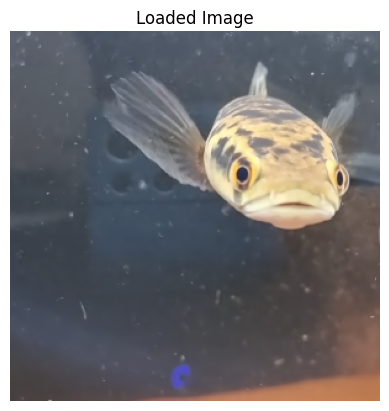

In [38]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np
test_img = 'D:\My File\KULIAH\SEMESTER 8\DOKUMEN MSIB 4\Startup Campus\Synchronize Team\Code\channa_classifier\Data\Test\maru\maru (81).png'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [39]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

ANDRAO : 4.84 %
ASIATICA : 22.1 %
AURANTI : 4.18 %
BARCA : 9.2 %
MARU : 57.51 %
STEWARTII : 2.16 %


1/1 [==============================] - 0s 138ms/step
Probability: 0.97899
Classified: maru 



Text(0.5, 1.0, 'Loaded Image')

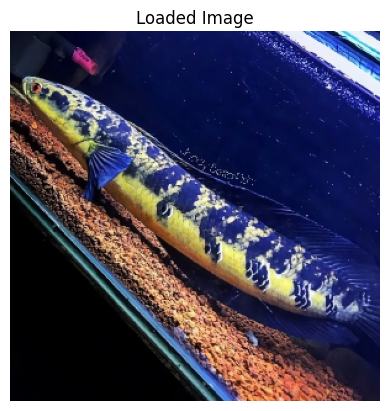

In [40]:
test_img = 'D:\My File\KULIAH\SEMESTER 8\DOKUMEN MSIB 4\Startup Campus\Synchronize Team\Code\channa_classifier\Data\Test\maru\maru (100).png'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [41]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

ANDRAO : 0.06 %
ASIATICA : 0.07 %
AURANTI : 1.88 %
BARCA : 0.07 %
MARU : 97.9 %
STEWARTII : 0.03 %


1/1 [==============================] - 0s 119ms/step
Probability: 0.60325116
Classified: maru 



Text(0.5, 1.0, 'Loaded Image')

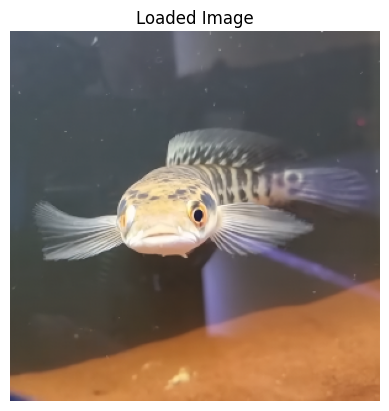

In [42]:
test_img = 'D:\My File\KULIAH\SEMESTER 8\DOKUMEN MSIB 4\Startup Campus\Synchronize Team\Code\channa_classifier\Data\Test\maru\maru (90).png'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [43]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

ANDRAO : 1.87 %
ASIATICA : 1.98 %
AURANTI : 11.32 %
BARCA : 11.17 %
MARU : 60.33 %
STEWARTII : 13.33 %


### *Testing shows that the model is fairly successful in classifying the type of waste*

## ***Saving model as 'model.h5'***

In [28]:
model.save('D:\My File\KULIAH\SEMESTER 8\DOKUMEN MSIB 4\Startup Campus\Synchronize Team\Code\channa_classifier\weights\model.h5')